<div class="alert alert-block alert-success">
    <h1 align="center"> DBScan (Weather Stations Dataset)</h1>
    <h3 align="center"><a href="https://github.com/amirhosein-ziaei">Amirhosein Ziaei</a></h3>
</div>

## *What is DBScan?*

***DBSCAN (Density-Based Spatial Clustering of Applications with Noise)*** 

Finds core samples of high density and expands clusters from them. ... This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

## *DBScan (Step by Step)*

<p align="center">
    <img src="Images/dbscan_1.jpeg" width="680"\>
</p>

<p align="center">
    <img src="Images/dbscan_2.png" width="680"\>
</p>

Usually 2 parameters for DBSCAN to Optimize 
* <font color='red'>Epsilon</font> 
* <font color='red'>Minimum Points</font>

<font color='red'>Epsilon $(\epsilon)$ </font> determines how much close the points should be to be considered a part of a cluster and <font color='red'>Minimum Points _(MinPts)_ </font> determines how many number of samples (points) need to be considered around a point within the radius $\epsilon$ to be considered as a _Core Point_. _MinPts_ include the point in consideration itself.   


We start with loading the Canada Weather Data-Set. We will __cluster weather stations that show similar weather conditions__. Selection of features and applications on clustering will be shown. Since the data domain is not so well understood, it is always best to play around with $\epsilon$ and _MinPts_ parameter in Scikit learn.  

* Core — This is a point that has at least m points within distance n from itself.
* Border — This is a point that has at least one Core point at a distance n.
* Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself. 

<p align="center">
    <img src="Images/dbscan_3.jpeg" width="680"\>
</p>

<p align="center">
    <img src="Images/dbscan_4.png" width="680"\>
</p>

<p align="center">
    <img src="Images/dbscan_5.jpeg" width="680"\>
</p>

<p align="center">
    <img src="Images/dbscan_6.png" width="680"\>
</p>

<p align="center">
    <img src="Images/dbscan_7.png" width="680"\>
</p>

<p align="center">
    <img src="Images/dbscan_8.png" width="680"\>
</p>

<p align="center">
    <img src="Images/dbscan_9.jpeg" width="680"\>
</p>

## *DBScan vs K-means?* 

<p align="center">
    <img src="Images/dbscan_10.jpeg" width="680"\>
</p>

## *DBScan Animation*

http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN)

## *Importing Libraries*

In [3]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## *Importing Dataset*

In [4]:
weather_df = pd.read_csv('Datasets/weather-stations.csv')

## *Data Preprocessing*

In [5]:
print ("Shape of the DataFrame: ", weather_df.shape)
weather_df.head(3) 

Shape of the DataFrame:  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

So there are 25 columns and now we need to learn more about the Columns, The names that are difficult to guess 
* Stn_Name === Station Name
* Prov     === Province
* Tm       === Mean Temperature (°C)
* Tn       === Lowest Monthly Minimum Temperature 
* Tx       === Highest Monthly Maximum Temperature 
* DwTm     === Days Without Valid Mean Temperature
* DwTx     === Days Without Valid Maximum Temperature
* DwTn     === Days Without Valid Minimum Temperature
* D        === Mean Temperature Difference from Normal
* S        === Snowfall (cm)
* DwS      === Days Without Snowfall
* S%N      === Percent of Normal Snowfall
* P        === Total Precipitation (mm)
* DwP      === Days Without Valid Precipitation
* P%N      === Percent of Normal Precipitation
* Pd       === No. of days with precipitation 1mm or More 
* BS       === Bright Sunshine days
* DwBS     === Days Without valid Bright Sunshine
* BS%      === Percent of Normal Bright Sunshine
* HDD      === Degree Days Below $18^{\circ}$C 
* CDD      === Degree Days Above $18^{\circ}$C
* Stn_No   === Station Number; Climate Station Identifier (1st 3 Digits==Indicate drainage basin, Last 4 Digits Sorting Alphabetically)



In [8]:
weather_df.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [9]:
weather_df.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)
print ("After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column: ", weather_df.shape)

After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column:  (1255, 25)


## *Density Based Spatial Clustering of Applications with Noise*

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-140
ulon=-50
llat=40
ulat=75

# selecting the boundaries of the map from lattitude and longitude 

weather_df = weather_df[(weather_df['Long'] > llon) & (weather_df['Long'] < ulon) & 
                        (weather_df['Lat'] > llat) &(weather_df['Lat'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))
weather_df['xm']= xs.tolist()
weather_df['ym'] =ys.tolist()

#Visualization1
for index,row in weather_df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Weather Stations in Canada", fontsize=14)
plt.savefig("Canada_WS.png", dpi=300)
plt.show()

### Clustering Weather Stations Based on Mean, Maximum and Minimum Temperature. <br>

#### In the DataFrame the Variables are Tm, Tn, Tx.   <br> First we check the distribution of the temperatures to get an rough Idea. Find the maximum, minimum of these three features to get a rough idea.  

In [10]:
print ("Minimum Mean temperature: ", weather_df['Tm'].min())
print ("Minimum Max Temperature: ", weather_df['Tx'].min())
print ("Maximun Min Temperature: ", weather_df['Tn'].max())

Minimum Mean temperature:  -38.2
Minimum Max Temperature:  -29.8
Maximun Min Temperature:  5.3


C:\Users\amirhosein\AppData\Local\Temp\ipykernel_3344\1801724726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_df['Tm'], color='purple', kde=False)


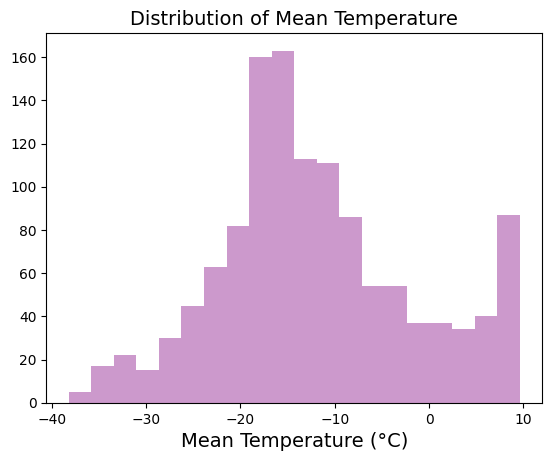

In [11]:
sns.distplot(weather_df['Tm'], color='purple', kde=False)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.title("Distribution of Mean Temperature", fontsize=14)
plt.savefig("Dist_of_Mean_Temp.png", dpi=200)
plt.show()

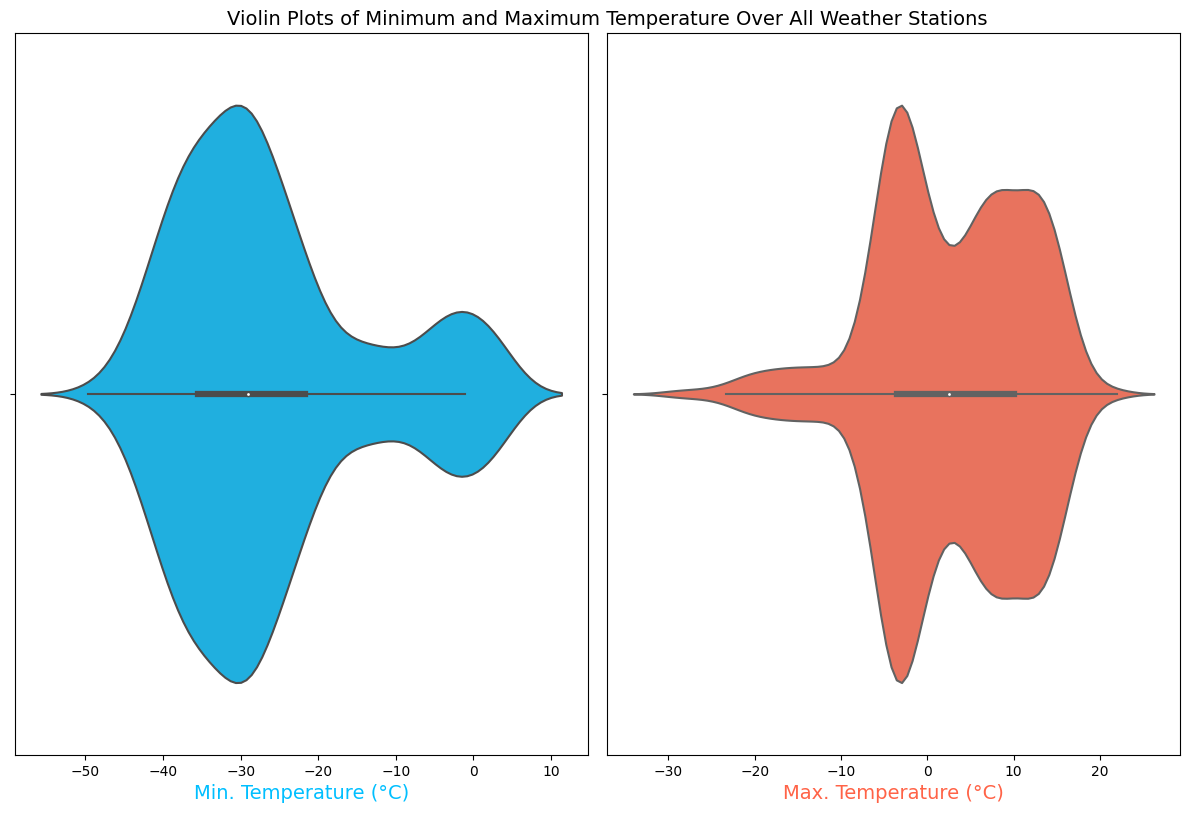

In [12]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x=weather_df["Tn"], color='deepskyblue')
plt.xlabel("Min. Temperature (°C)", fontsize=14, color='deepskyblue')
plt.subplot(1,2,2)
sns.violinplot(x=weather_df["Tx"], color='tomato')
plt.xlabel("Max. Temperature (°C)", fontsize=14, color='tomato')
plt.tight_layout()
plt.title("Violin Plots of Minimum and Maximum Temperature Over All Weather Stations", fontsize=14, x=-0.0)
plt.savefig("Violin_Plots_Min_Max_Temp.png", dpi=200)
plt.show()